## Loan Status Prediction Problem
Given the data, we need to predict if a person gets his/her loan approved or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.shape,test.shape

((614, 13), (367, 12))

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Univariate Analysis

Text(0, 0.5, 'Number of people')

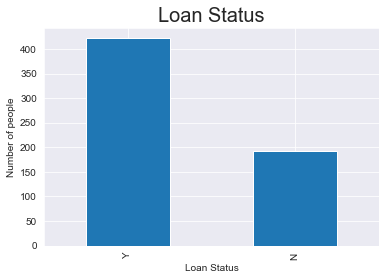

In [10]:
train['Loan_Status'].value_counts().plot.bar()
plt.title('Loan Status',fontdict={'fontsize':20,})
plt.xlabel('Loan Status')
plt.ylabel('Number of people')

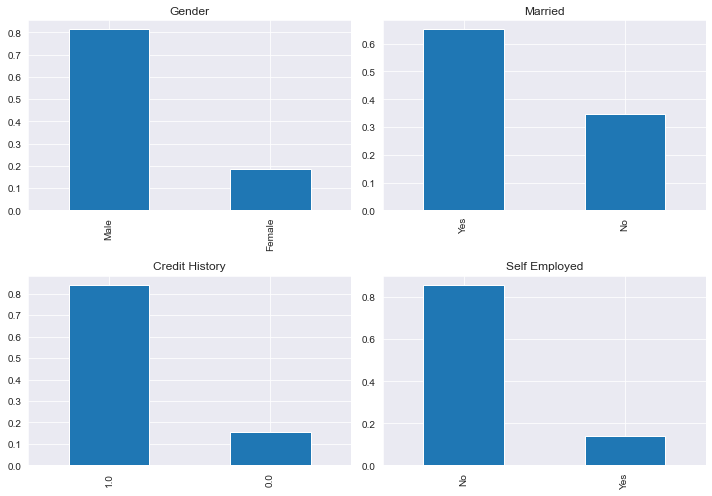

In [11]:
#Categorical Variables

fig = plt.figure(figsize=(10,7))
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.subplot(224)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.tight_layout()

From the above graphs, we infer that:
1. 80% of the population is male.
2. Around 15% are self employed.
3. Around 85% have repaid their debts.
4. Around 65% of the applicants are married.

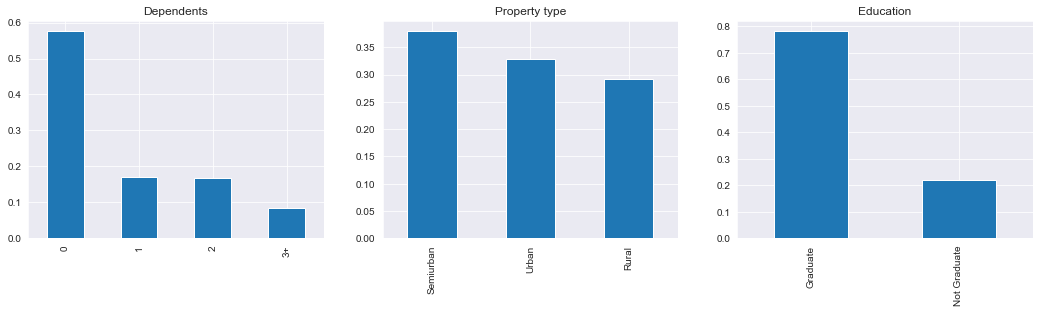

In [12]:
#Ordinal variables

fig = plt.figure(figsize=(18,4))
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(132)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property type')
plt.subplot(133)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

From the above graphs, we infer that:
1. Most of the applicants do not have any dependents
2. Around 78% of the applicants are graduates.
3. Most of the applicants are from Semiurban area.

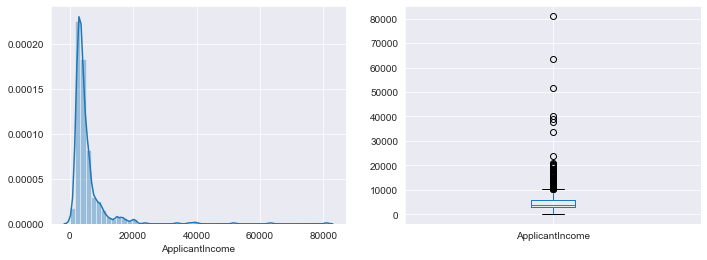

In [13]:
# Numerical Variables

fig = plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(train['ApplicantIncome'])
plt.subplot(132)
train['ApplicantIncome'].plot.box()

From the boxplot, we can infer that there are a lot of outliers indicating the income disparity in the society.

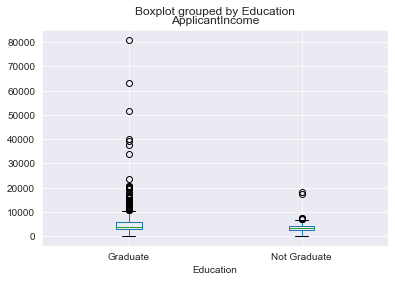

In [14]:
train.boxplot(column='ApplicantIncome',by='Education')

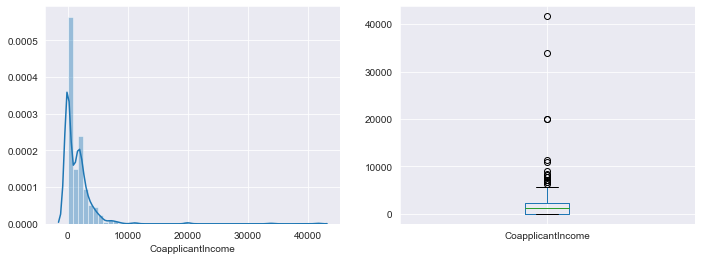

In [15]:
fig = plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(132)
train['CoapplicantIncome'].plot.box(figsize=(18,4))

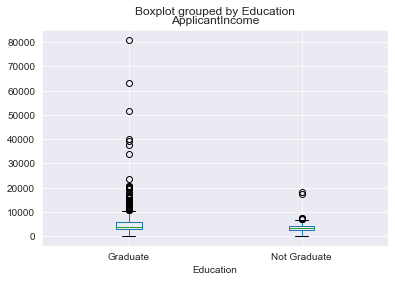

In [16]:
train.boxplot(column='ApplicantIncome',by='Education')

We see a similar distribution in the Co-Applicants Income also.

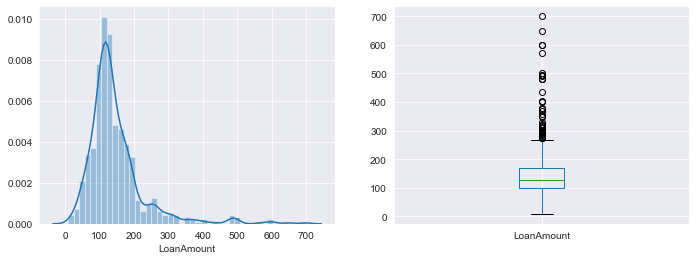

In [17]:
fig = plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(train['LoanAmount'])
plt.subplot(132)
train['LoanAmount'].plot.box(figsize=(18,4))

We see that the distribution for Loan Amount is fairly normal.

# Bivariate Analysis

In [18]:
#Categorical VS Target Variable

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Self = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Credit = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])

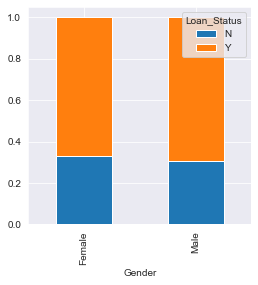

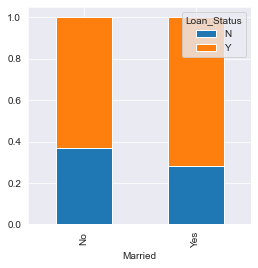

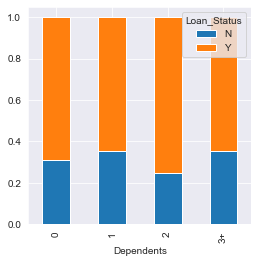

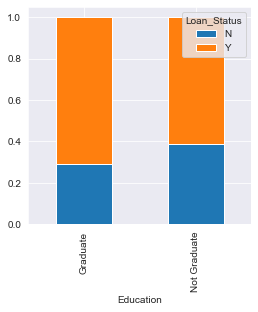

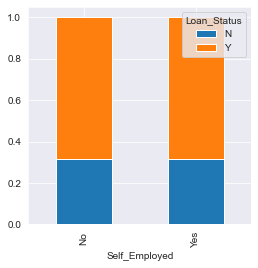

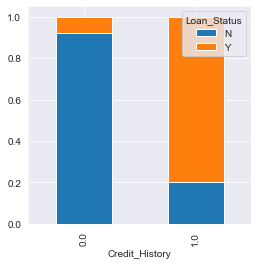

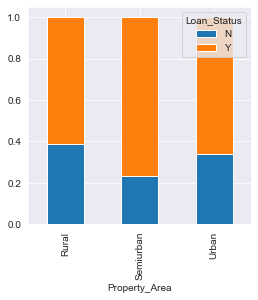

In [19]:
x = [Gender, Married, Dependents, Education,
       Self,Credit, Area]
for i in x: 
    i.div(i.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))


From the above, the following inferences can be made:
1. The proportion of loan approved for both male and female is more or less the same
2. Proportion of loans getting approved for graduates is more than the non-graduates.
3. Proportion of loans getting approved for people in semiurban area is more than the people of other areas.
4. As expected, the people who have repaid their previous debts are more likely to get their loan approved.

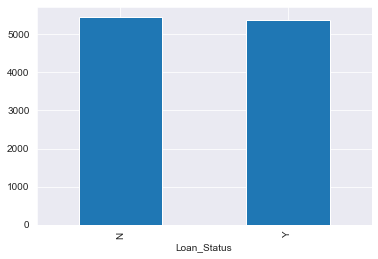

In [20]:
# Numerical VS Target Variable

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')

We see that there is no change in the mean income on the basis of loan status.

In [21]:
bins=[0,2500,4000,6000,81000]
group=['low','average','high','very high']
train['Applicant_Income'] = pd.cut(train['ApplicantIncome'],bins=bins,labels=group)

In [22]:
bins = [0,3000,6000,10000,42000]
group=['low','average','high','very high']
train['Coapplicant_income'] = pd.cut(train['CoapplicantIncome'],bins=bins,labels=group)

In [23]:
ApplicantIncome = pd.crosstab(train['Applicant_Income'],train['Loan_Status'])
Coapplicant_Income = pd.crosstab(train['Coapplicant_income'],train['Loan_Status'])

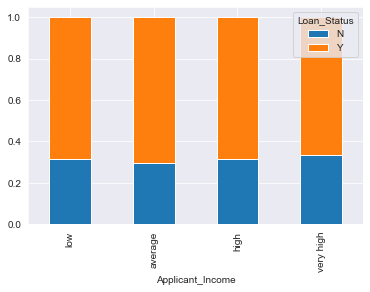

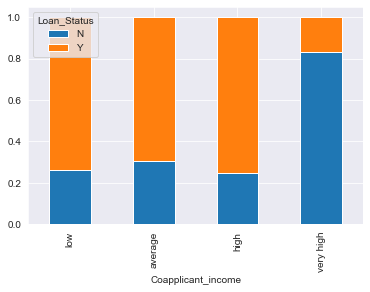

In [24]:
y = [ApplicantIncome,Coapplicant_Income]
for i in y:
    i.div(i.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

We can infer that the Applicants income has no effect on the approval of the loan since the mean income does not change with respect to the loan status.
However, it shows that if coapplicants income is high, the chances of getting a loan are less. This does not looks right, probably because there are a lot of missing values in the coapplicants income column.

In [25]:
#Combining Applicants income and Coapplicants income

train['TotalIncome'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
groups = ['low','average','high','very high']
train['total_income_bins'] = pd.cut(train['TotalIncome'],bins=bins,labels=groups)

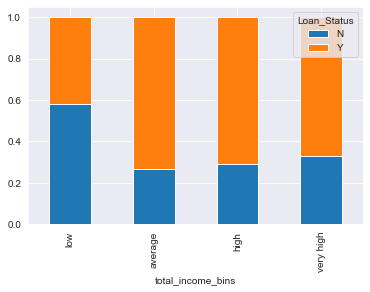

In [26]:
total = pd.crosstab(train['total_income_bins'],train['Loan_Status'])
total.div(total.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

We can see that as the combined income rises, the chances of getting a loan also increases.

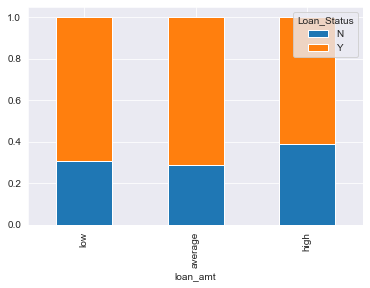

In [27]:
bins = [0,100,200,700]
group = ['low','average','high']
train['loan_amt'] = pd.cut(train['LoanAmount'],bins=bins,labels=group)
loan = pd.crosstab(train['loan_amt'],train['Loan_Status'])
loan.div(loan.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [28]:
train = train.drop(['Applicant_Income', 'Coapplicant_income',
       'TotalIncome', 'total_income_bins', 'loan_amt'],axis=1)


In [29]:
train.shape

(614, 13)

In [30]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [31]:
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

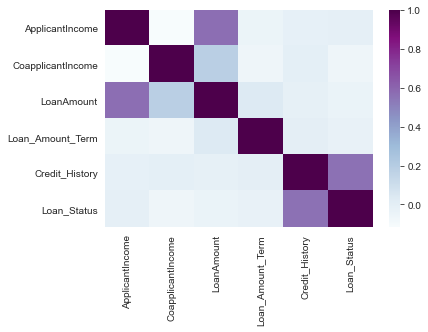

In [32]:
#Numerical Variables
matrix = train.corr()
sns.heatmap(data=matrix,cmap='BuPu')

# Missing Value and Outliers

In [33]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
#We fill the missing values of the categorical variables with its mode. 
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [35]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

We can see that 360 is repeating the most in the Loan Amount Term column. Hence we fill all the missing values with the mode of Loan Amount Term. 

In [36]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [37]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [38]:
#Performing the above operations on test column.
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

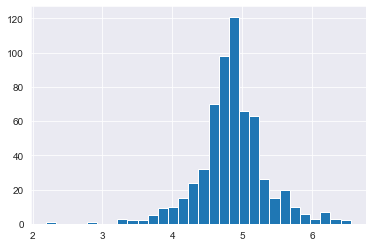

In [39]:
#Treating the outliers
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins=30)

Now the distribution looks fairly normal.

# Model Building - I

In [40]:
train = train.drop('Loan_ID',axis=1)
test =  test.drop('Loan_ID',axis=1)

In [41]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [42]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train,y_train)

LogisticRegression()

In [48]:
predictions = model.predict(X_test)

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.47      0.57        53
           1       0.81      0.93      0.87       132

    accuracy                           0.80       185
   macro avg       0.77      0.70      0.72       185
weighted avg       0.79      0.80      0.78       185



In [50]:
accuracy_score(y_test,predictions)

0.8

The model shows 80% accuracy.


In [51]:
#Predictions on the test data set
pred_test = model.predict(test)

In [52]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [53]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [54]:
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [55]:
pd.DataFrame(submission,columns=['Loan_Status','Loan_ID']).to_csv('logistic.csv')

In [60]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [61]:
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

# Feature Engineering

We create 3 new variables to get better predictions:
1. Total Income: Combined Income of Applicants Income and Coapplicants Income. As seen earlier, higher the Total Income, higher the chances of the loan getting approved.
2. EMI: EMI is the monthly amount paid to the bank to repay the loan. Higher the EMI, the more people will find it difficult to repay the loan.
3. Balance Income: This is income left after the EMI has been paid. Higher the Balance Income, Higher the chances of Loan Approval. 

In [62]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

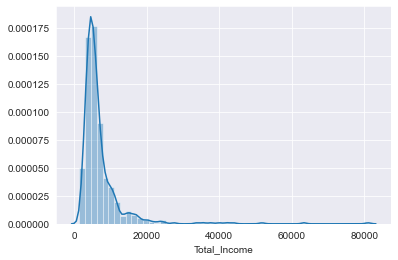

In [63]:
sns.distplot(train['Total_Income'])

The distribution is rightly skewed.

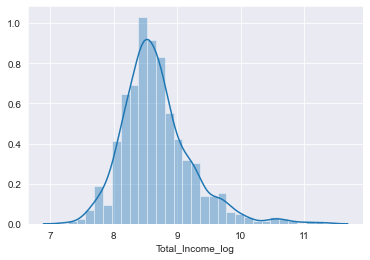

In [64]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])

In [65]:
test['Total_Income_log'] = np.log(test['Total_Income'])

In [66]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

In [67]:
train['Balance_Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance_Income'] = test['Total_Income']-(test['EMI']*1000)

In [68]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [84]:
X =  train.drop(['Loan_Status','Total_Income'],axis=1)
y = train['Loan_Status']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [86]:
logreg = LogisticRegression()

In [87]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [88]:
preds = logreg.predict(X_test)

In [89]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.44      0.58        62
           1       0.77      0.97      0.86       123

    accuracy                           0.79       185
   macro avg       0.82      0.70      0.72       185
weighted avg       0.81      0.79      0.77       185



We can infer that feature engineering has not improved the model.
Hence, We will now try Decision Trees and Random Forest algorithm.

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
tree = DecisionTreeClassifier()

In [94]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [95]:
d_preds = tree.predict(X_test)

In [96]:
print(classification_report(y_test,d_preds))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59        62
           1       0.80      0.77      0.79       123

    accuracy                           0.72       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.72      0.72      0.72       185



We can infer that the accuracy score is much less than the logistic regression model.

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(n_estimators=600)

In [99]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [102]:
rfc_preds = rfc.predict(X_test)

In [103]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        62
           1       0.79      0.95      0.86       123

    accuracy                           0.79       185
   macro avg       0.81      0.72      0.74       185
weighted avg       0.80      0.79      0.78       185



We can infer that we get the same accuracy score as with logistic regression model.

Hence, we conclude that the Logistic Regression Model performed the best and we get an accuracy of **80%**.